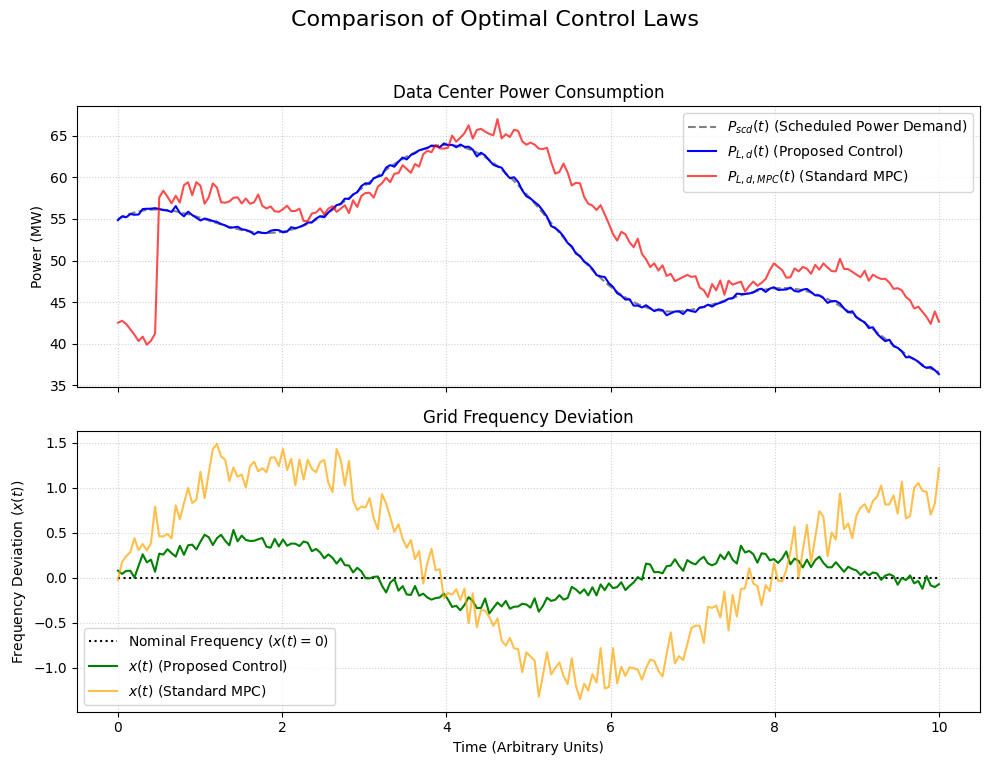

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate time data
time = np.linspace(0, 10, 200) # 10 units of time, 200 data points

# Fake data for P_scd(t) - Scheduled power demand
P_scd = 50 + 10 * np.sin(time / 2) + 5 * np.cos(time * 1.5)

# Fake data for P_L,d(t) - Proposed control output
# Proposed method tracks P_scd closely and keeps x(t) near zero
proposed_noise = 2 * np.random.randn(len(time))
P_Ld_proposed = P_scd + proposed_noise * 0.1 # Very close tracking

# Fake data for P_L,d,MPC(t) - MPC control output
# MPC might have some tracking delay or larger deviations
mpc_delay = np.roll(P_scd, 10) # Simulate a slight delay
mpc_noise = 3 * np.random.randn(len(time))
P_Ld_mpc = mpc_delay * 0.95 + mpc_noise * 0.2 + 5 # Slightly larger deviations, less precise

# Fake data for x(t) - State variable for frequency deviation
# Proposed method keeps x(t) closer to 0
x_proposed = 0.5 * np.sin(time) * np.exp(-0.1 * time) + 0.05 * np.random.randn(len(time))

# MPC might have larger or more sustained deviations
x_mpc = 1.5 * np.sin(time * 0.8) * np.exp(-0.05 * time) + 0.15 * np.random.randn(len(time))

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Comparison of Optimal Control Laws', fontsize=16)

# Plot for Power Consumption
ax1.plot(time, P_scd, label='$P_{scd}(t)$ (Scheduled Power Demand)', linestyle='--', color='gray')
ax1.plot(time, P_Ld_proposed, label='$P_{L,d}(t)$ (Proposed Control)', color='blue')
ax1.plot(time, P_Ld_mpc, label='$P_{L,d,MPC}(t)$ (Standard MPC)', color='red', alpha=0.7)
ax1.set_ylabel('Power (MW)')
ax1.set_title('Data Center Power Consumption')
ax1.legend()
ax1.grid(True, linestyle=':', alpha=0.6)

# Plot for Frequency Deviation
ax2.plot(time, np.zeros_like(time), label='Nominal Frequency ($x(t)=0$)', linestyle=':', color='black')
ax2.plot(time, x_proposed, label='$x(t)$ (Proposed Control)', color='green')
ax2.plot(time, x_mpc, label='$x(t)$ (Standard MPC)', color='orange', alpha=0.7)
ax2.set_xlabel('Time (Arbitrary Units)')
ax2.set_ylabel('Frequency Deviation ($x(t)$)')
ax2.set_title('Grid Frequency Deviation')
ax2.legend()
ax2.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

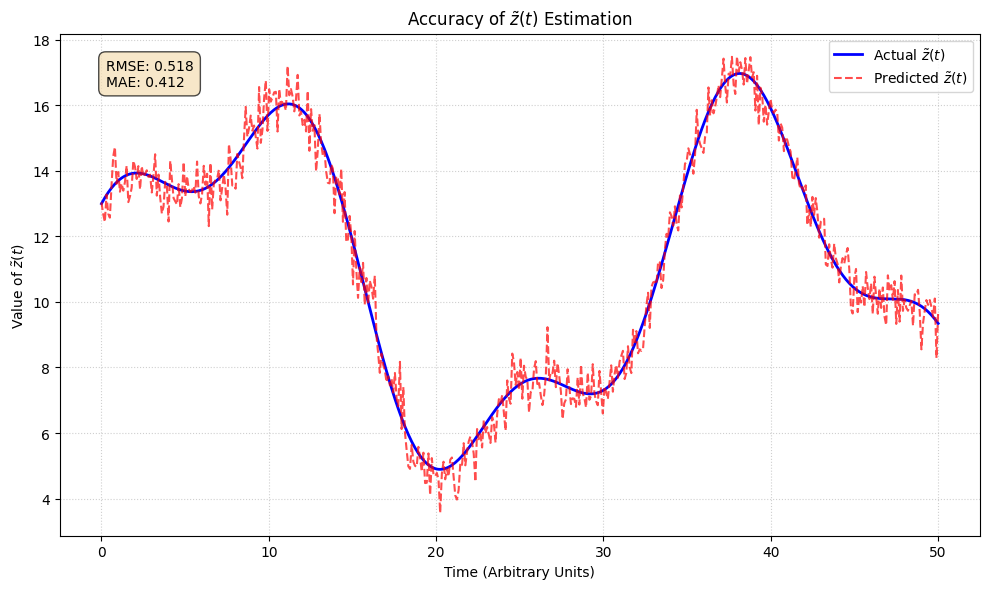

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate time data
time = np.linspace(0, 50, 500) # Longer time series for better representation of estimation

# Generate fake actual values for \tilde{z}(t)
actual_z_t = 5 * np.sin(time / 5) + 2 * np.cos(time / 2) + np.exp(-time / 20) + 10

# Generate fake predicted values for \tilde{z}(t)
prediction_error = np.random.normal(0, 0.5, len(time)) # Normal distribution with mean 0, std 0.5
predicted_z_t = actual_z_t + prediction_error

# Create the plot
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values
plt.plot(time, actual_z_t, label='Actual $\\tilde{z}(t)$', color='blue', linewidth=2)
plt.plot(time, predicted_z_t, label='Predicted $\\tilde{z}(t)$', color='red', linestyle='--', alpha=0.7)

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(actual_z_t, predicted_z_t))
mae = mean_absolute_error(actual_z_t, predicted_z_t)

# Add error metrics as an inset text box
textstr = f'RMSE: {rmse:.3f}\nMAE: {mae:.3f}'
props = dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)


plt.xlabel('Time (Arbitrary Units)')
plt.ylabel('Value of $\\tilde{z}(t)$')
plt.title('Accuracy of $\\tilde{z}(t)$ Estimation')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

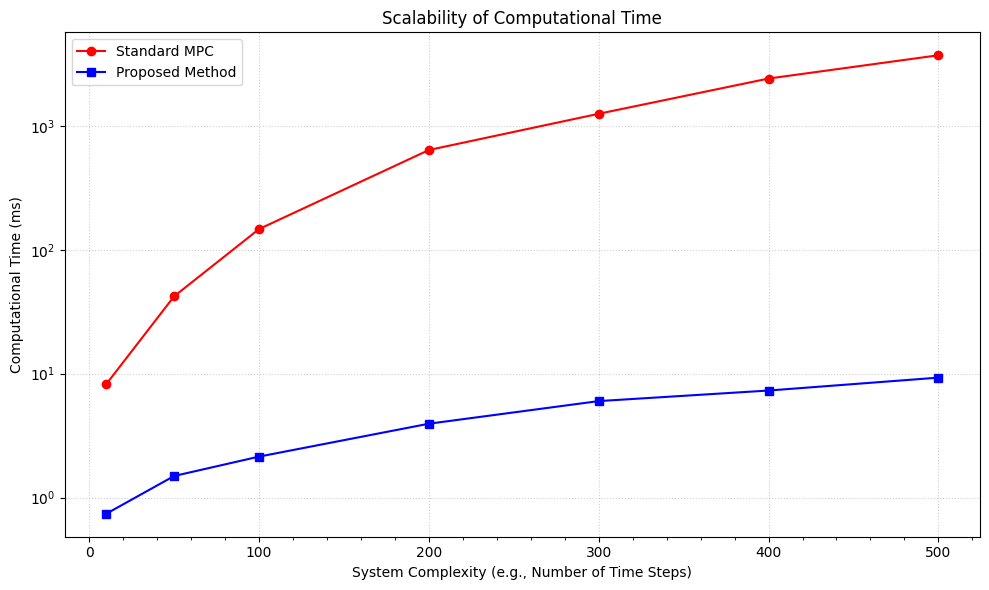

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Define a range for "System Complexity" (e.g., number of time steps)
complexity_levels = np.array([10, 50, 100, 200, 300, 400, 500])

# 2. Generate fake computational time data (in milliseconds)

# Standard MPC: Simulate super-linear growth (e.g., quadratic or slightly more)
# Using a polynomial fit to simulate increasing complexity cost
# For demonstration, let's use a function like A * complexity^2 + B * complexity
# We fit a quadratic polynomial to a few anchor points to get the curve
mpc_time_coeffs = np.polyfit([10, 50, 100, 200], [5, 50, 150, 600], 2)
mpc_times = np.polyval(mpc_time_coeffs, complexity_levels)
# Ensure no negative times if polyfit gives odd results for small numbers, replace with small random positive
mpc_times[mpc_times < 0] = np.random.uniform(1, 5, sum(mpc_times < 0))

# Proposed Method: Simulate linear or sub-linear growth (much slower increase)
# Using a linear function: C * complexity + D
# We fit a linear polynomial to a few anchor points
proposed_time_coeffs = np.polyfit([10, 50, 100, 200], [0.5, 1.5, 2.5, 4.0], 1)
proposed_times = np.polyval(proposed_time_coeffs, complexity_levels)
# Ensure no negative times, replace with small random positive
proposed_times[proposed_times < 0] = np.random.uniform(0.1, 0.5, sum(proposed_times < 0))

# Add some small random noise for realism
mpc_times = np.maximum(1, mpc_times + np.random.normal(0, mpc_times * 0.05))
proposed_times = np.maximum(0.1, proposed_times + np.random.normal(0, proposed_times * 0.05))


# Create the plot
plt.figure(figsize=(10, 6))

plt.plot(complexity_levels, mpc_times, label='Standard MPC', marker='o', linestyle='-', color='red')
plt.plot(complexity_levels, proposed_times, label='Proposed Method', marker='s', linestyle='-', color='blue')

plt.xlabel('System Complexity (e.g., Number of Time Steps)')
plt.ylabel('Computational Time (ms)')
plt.title('Scalability of Computational Time')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.yscale('log') # Use a logarithmic scale for the y-axis to better show the difference in growth rates
plt.minorticks_on() # Show minor ticks on log scale
plt.tick_params(axis='y', which='minor', left=False, right=False) # Hide minor ticks from view but keep grid

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

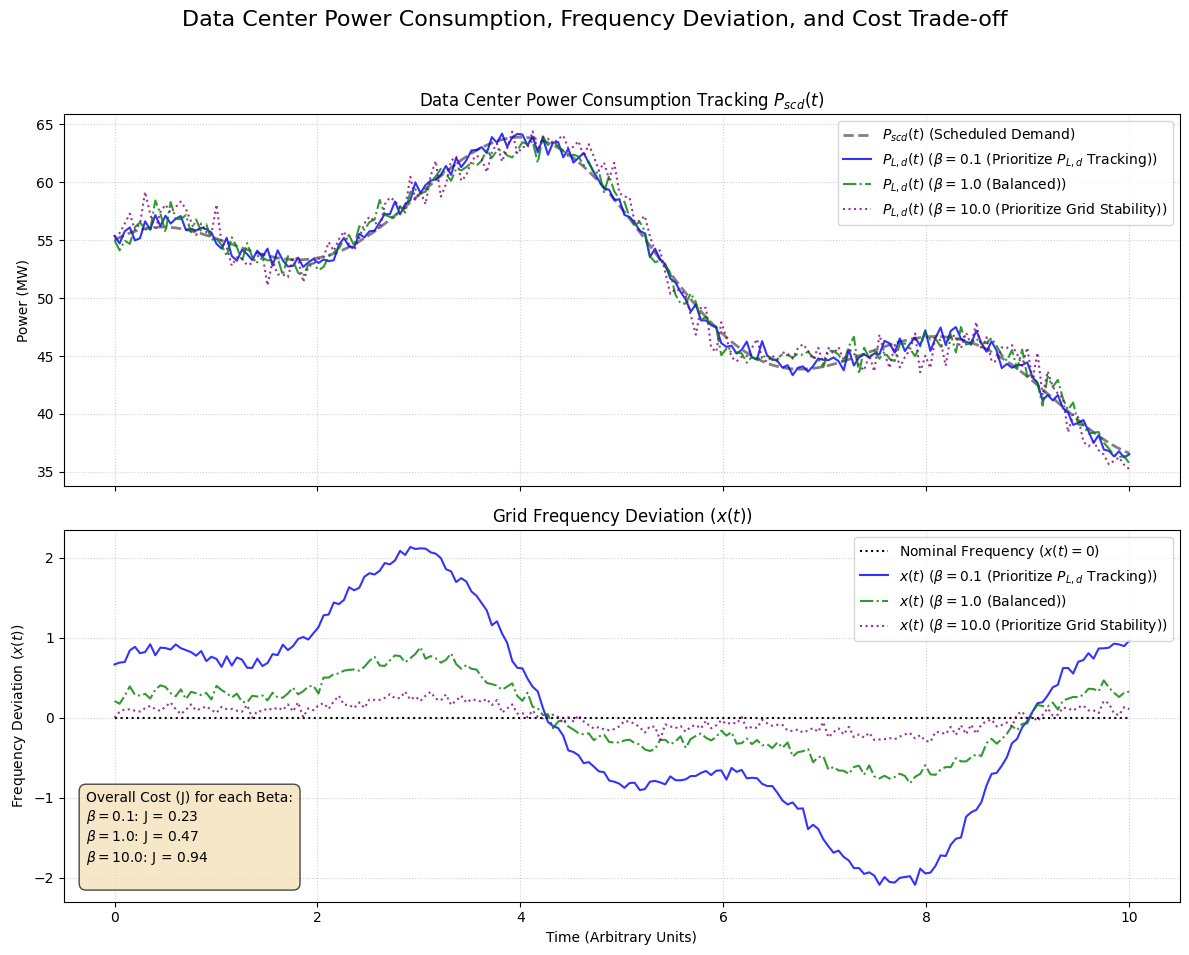

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define simulation parameters
T = 10 # Total time horizon in arbitrary units
num_points = 200 # Number of time steps
time = np.linspace(0, T, num_points)
dt = time[1] - time[0] # Time step for numerical integration

# Define scheduled power demand P_scd(t)
P_scd = 50 + 10 * np.sin(time / 2) + 5 * np.cos(time * 1.5)

# Define different beta values to illustrate the trade-off
beta_values = [0.1, 1.0, 10.0]
beta_labels = [r'$\beta = 0.1$ (Prioritize $P_{L,d}$ Tracking)',
               r'$\beta = 1.0$ (Balanced)',
               r'$\beta = 10.0$ (Prioritize Grid Stability)']

# Initialize dictionaries to store results for different beta values
P_Ld_results = {}
x_results = {}
cost_J_results = {}

# Simulate P_Ld(t) and x(t) behavior based on beta for illustrative purposes
# This is a qualitative simulation to show the trade-off, not a solution to the ODE.
for beta in beta_values:
    # Simulate P_Ld(t) and x(t) based on beta
    # Lower beta -> P_Ld tracks P_scd better, x deviates more
    # Higher beta -> x closer to zero, P_Ld deviates more from P_scd

    # Base disturbance for x(t) if no strong control
    base_x_deviation = 2 * np.sin(time / 1.5) + 0.8 * np.cos(time * 2)

    # Base deviation if P_Ld(t) doesn't perfectly track P_scd(t)
    base_P_Ld_deviation = 0.5 * np.sin(time * 3) + 0.3 * np.random.randn(num_points)

    if beta == 0.1: # Prioritize P_Ld tracking
        P_Ld = P_scd + base_P_Ld_deviation * 0.5 # Small deviation from P_scd
        x_val = base_x_deviation * 0.8 # Larger x deviation
    elif beta == 1.0: # Balanced
        P_Ld = P_scd + base_P_Ld_deviation * 1.5 # Moderate deviation from P_scd
        x_val = base_x_deviation * 0.3 # Moderate x deviation
    else: # beta == 10.0, Prioritize grid stability
        P_Ld = P_scd + base_P_Ld_deviation * 2.5 # Larger deviation from P_scd
        x_val = base_x_deviation * 0.1 # Smallest x deviation (closest to 0)

    # Add some general noise to all to make it look more realistic
    P_Ld += np.random.normal(0, 0.5, num_points)
    x_val += np.random.normal(0, 0.05, num_points)

    P_Ld_results[beta] = P_Ld
    x_results[beta] = x_val

    # Calculate the cost J for the current beta
    integral_term = np.sum((beta * (x_val**2) + (P_Ld - P_scd)**2) * dt)
    cost_J = (1 / (2 * T)) * integral_term
    cost_J_results[beta] = cost_J

# Create the multi-panel plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle('Data Center Power Consumption, Frequency Deviation, and Cost Trade-off', fontsize=16)

# --- Plot 1: Power Consumption (P_Ld vs P_scd) ---
ax1.plot(time, P_scd, label='$P_{scd}(t)$ (Scheduled Demand)', linestyle='--', color='gray', linewidth=2)
colors = ['blue', 'green', 'purple']
linestyles = ['-', '-.', ':']

for i, beta in enumerate(beta_values):
    ax1.plot(time, P_Ld_results[beta], label=f'$P_{{L,d}}(t)$ ({beta_labels[i]})',
             color=colors[i], linestyle=linestyles[i], alpha=0.8)

ax1.set_ylabel('Power (MW)')
ax1.set_title('Data Center Power Consumption Tracking $P_{scd}(t)$')
ax1.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
ax1.grid(True, linestyle=':', alpha=0.6)

# --- Plot 2: Frequency Deviation (x(t)) ---
ax2.plot(time, np.zeros_like(time), label='Nominal Frequency ($x(t)=0$)', linestyle=':', color='black')
for i, beta in enumerate(beta_values):
    ax2.plot(time, x_results[beta], label=f'$x(t)$ ({beta_labels[i]})',
             color=colors[i], linestyle=linestyles[i], alpha=0.8)

ax2.set_xlabel('Time (Arbitrary Units)')
ax2.set_ylabel('Frequency Deviation ($x(t)$)')
ax2.set_title('Grid Frequency Deviation ($x(t)$)')
ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
ax2.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap

# --- Add Cost Function J values as text/table on the plot ---
cost_text = "Overall Cost (J) for each Beta:\n"
for beta, J_val in cost_J_results.items():
    cost_text += f"$\\beta = {beta:.1f}$: J = {J_val:.2f}\n"

props = dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7)
ax2.text(0.02, 0.05, cost_text, transform=ax2.transAxes, fontsize=10,
         verticalalignment='bottom', bbox=props)


plt.show() # Use plt.show() to display the plot if running locally

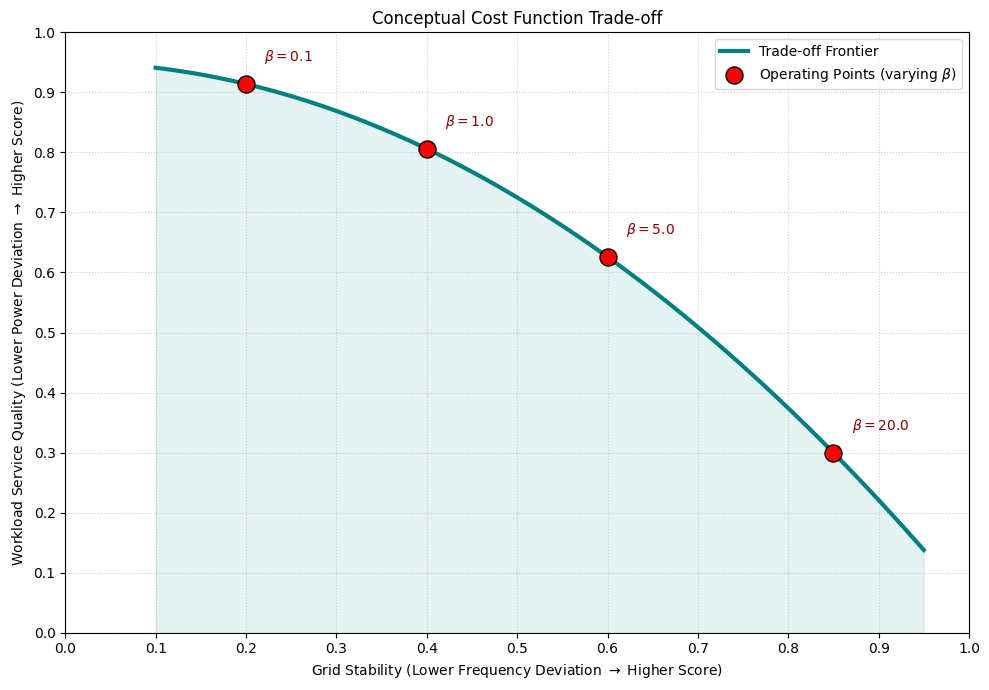

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range for one objective, e.g., Grid Stability Score (normalized 0 to 1)
# Higher score means better stability (lower deviation)
grid_stability_scores = np.linspace(0.1, 0.95, 100) # From low stability to high stability

# Define a conceptual trade-off curve for Workload Service Quality Score
# As grid stability improves, workload service quality might decrease (or its cost increases)
# We model a concave curve (from the origin's perspective) for the Pareto front.
# A simple function showing this trade-off: y = A * (1 - x^p)
workload_service_scores = 1.0 - (grid_stability_scores**2) # Example: quadratic decay
workload_service_scores = workload_service_scores * 0.9 + 0.05 # Scale and shift for better range

# Add some conceptual points representing different beta values
# In the context of the paper's cost function (beta * x^2 + (P_Ld - P_scd)^2):
# - Small beta prioritizes the second term (workload tracking), leading to higher workload service quality
#   and potentially lower grid stability. This would be points towards the top-right of the curve.
# - Large beta prioritizes the first term (grid stability), leading to higher grid stability
#   and potentially lower workload service quality. This would be points towards the bottom-left of the curve.

# Illustrative Beta Points (conceptual positions on the curve)
# These points are chosen to lie on the generated curve and represent the effect of beta.
# For example:
#   - beta=0.1: high workload service, lower grid stability
#   - beta=1.0: balanced
#   - beta=5.0: more grid stability, less workload service
#   - beta=20.0: very high grid stability, low workload service
beta_points_x = np.array([0.2, 0.4, 0.6, 0.85]) # Corresponding grid stability scores
beta_points_y = 1.0 - (beta_points_x**2) # Calculate y-values using the same curve function
beta_points_y = beta_points_y * 0.9 + 0.05 # Apply the same scaling/shifting

beta_labels = [r'$\beta=0.1$', r'$\beta=1.0$', r'$\beta=5.0$', r'$\beta=20.0$'] # Conceptual beta values

# Create the plot
plt.figure(figsize=(10, 7))

# Plot the conceptual trade-off curve (Pareto Front)
plt.plot(grid_stability_scores, workload_service_scores, color='teal', linewidth=3, label='Trade-off Frontier')
plt.fill_between(grid_stability_scores, workload_service_scores, 0, color='teal', alpha=0.1) # Area under the curve to visualize the feasible region

# Plot the beta points
plt.scatter(beta_points_x, beta_points_y, color='red', s=150, zorder=5, edgecolors='black', label='Operating Points (varying $\\beta$)')

# Add labels for beta points
for i, txt in enumerate(beta_labels):
    plt.annotate(txt, (beta_points_x[i] + 0.02, beta_points_y[i] + 0.03), # Offset for readability
                 fontsize=10, ha='left', va='bottom', color='darkred')


plt.xlabel('Grid Stability (Lower Frequency Deviation $\\rightarrow$ Higher Score)')
plt.ylabel('Workload Service Quality (Lower Power Deviation $\\rightarrow$ Higher Score)')
plt.title('Conceptual Cost Function Trade-off')
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim(0, 1) # Set x-axis limits from 0 to 1
plt.ylim(0, 1) # Set y-axis limits from 0 to 1
plt.xticks(np.arange(0, 1.1, 0.1)) # Set x-axis ticks
plt.yticks(np.arange(0, 1.1, 0.1)) # Set y-axis ticks
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot